In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prophet Diario

In [2]:
#cargame los pickle y_test_diario y Y_train_diario
y_test_diario = pd.read_pickle('y_test_diario.pkl')
y_train_diario = pd.read_pickle('y_train_diario.pkl')
#concat los dos dataframes
y_diario = pd.concat([y_train_diario, y_test_diario])

#Pasa mi index a una columna
y_diario.reset_index(level=0, inplace=True)
#llama a la columna inex fecha
y_diario.rename(columns={'index':'fecha'}, inplace=True)

#llama a la columna visitantes totales visitantes
y_diario.rename(columns={'Visitantes totales':'visitantes'}, inplace=True)
y_diario

,fecha,visitantes
0,2013-01-01,2338
1,2013-01-02,9376
2,2013-01-03,9190
3,2013-01-04,9523
4,2013-01-05,5492
...,...,...
1456,2016-12-27,23928
1457,2016-12-28,23960
1458,2016-12-29,24279
1459,2016-12-30,22763


In [3]:
import pandas as pd

# Supongamos que 'fecha' es tu columna de fechas y 'visitantes' es tu columna de valores
# Carga tus datos si no los tienes ya en un DataFrame de Pandas
# y_semanal = pd.read_csv('tu_archivo.csv')  # O carga desde el archivo correspondiente

# Asegúrate de que 'fecha' sea de tipo datetime si no lo es
y_diario['fecha'] = pd.to_datetime(y_diario['fecha'])

# Renombra las columnas a 'ds' y 'y'
y_diario.rename(columns={'fecha': 'ds', 'visitantes': 'y'}, inplace=True)

# Muestra las primeras filas para verificar la transformación
print(y_diario.head())

          ds     y
0 2013-01-01  2338
1 2013-01-02  9376
2 2013-01-03  9190
3 2013-01-04  9523
4 2013-01-05  5492


<Axes: >

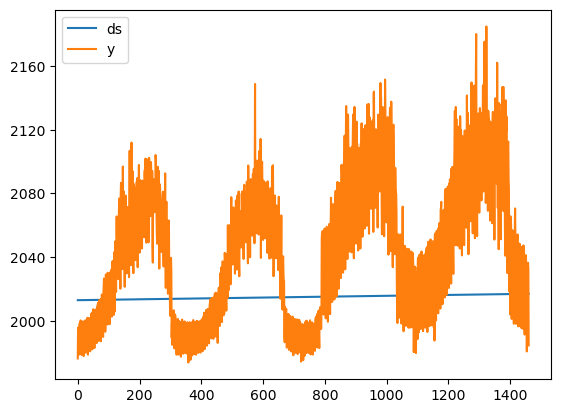

In [4]:
y_diario.plot()

In [5]:
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
train_diario, test_diario = train_test_split(y_diario, test_size=0.2, shuffle=False)  # Por ejemplo, 80% entrenamiento y 20% prueba

# Inicializar y ajustar el modelo Prophet con los datos de entrenamiento
model = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=0.1,
    holidays_prior_scale=0.01,
    changepoint_range=0.9,
    yearly_seasonality=20
)
model.fit(train_diario)

# Realizar predicciones en el conjunto de prueba
forecast_diario = model.predict(test_diario)

# Mostrar las predicciones y los valores reales
print(forecast_diario[['ds', 'yhat']])
print(test_diario[['ds', 'y']])

# Calcular alguna métrica de desempeño si es necesario
# Por ejemplo, puedes utilizar métricas como RMSE o MAE para evaluar el modelo

c:\Users\Pepe\anaconda3\envs\Prophet\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
18:14:04 - cmdstanpy - INFO - Chain [1] start processing
18:14:04 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat
0   2016-03-14  31684.211147
1   2016-03-15  32960.358028
2   2016-03-16  32394.205126
3   2016-03-17  31935.292529
4   2016-03-18  31376.986365
..         ...           ...
288 2016-12-27  23268.102858
289 2016-12-28  22282.346507
290 2016-12-29  21565.145419
291 2016-12-30  20926.882874
292 2016-12-31  13894.797045

[293 rows x 2 columns]
             ds      y
1168 2016-03-14  32165
1169 2016-03-15  31955
1170 2016-03-16  33313
1171 2016-03-17  33371
1172 2016-03-18  33249
...         ...    ...
1456 2016-12-27  23928
1457 2016-12-28  23960
1458 2016-12-29  24279
1459 2016-12-30  22763
1460 2016-12-31   5346

[293 rows x 2 columns]


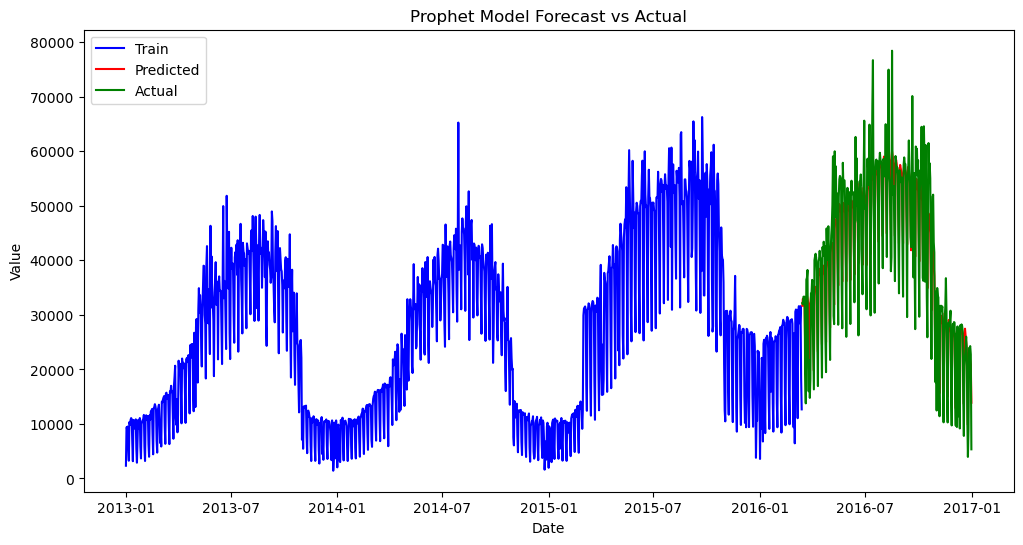

In [6]:
import matplotlib.pyplot as plt

# Graficar los datos de entrenamiento y las predicciones en el conjunto de prueba
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar datos de entrenamiento
ax.plot(train_diario['ds'], train_diario['y'], label='Train', color='blue')

# Graficar predicciones en el conjunto de prueba
ax.plot(test_diario['ds'], forecast_diario['yhat'], label='Predicted', color='red')

# Graficar los valores reales en el conjunto de prueba
ax.plot(test_diario['ds'], test_diario['y'], label='Actual', color='green')

# Configuración del gráfico
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model Forecast vs Actual')
plt.legend()
plt.show()

In [7]:
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else 0.0

# Calcular el MAPE entre las predicciones y los valores reales evitando los ceros
mape = mean_absolute_percentage_error(test_diario['y'].values, forecast_diario['yhat'].values)

print(f"El MAPE es: {mape:.2f}%")


El MAPE es: 15.84%


In [8]:
from sklearn.metrics import mean_squared_error, r2_score



# Calculando MSE
mse = mean_squared_error(test_diario['y'].values, forecast_diario['yhat'].values)

# Calculando R2 score
r2 = r2_score(test_diario['y'].values, forecast_diario['yhat'].values)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"R2 score: {r2:.2f}")


MAPE: 15.84%
MSE: 38547890.77
R2 score: 0.84


# Prophet Semanal

In [9]:
#cargame los pickle y_test_semanal y Y_train_semanal
y_test_semanal = pd.read_pickle('y_test_semanal.pkl')
y_train_semanal = pd.read_pickle('y_train_semanal.pkl')
#concat los dos dataframes
y_semanal = pd.concat([y_train_semanal, y_test_semanal])
y_semanal
#Pasa mi index a una columna
y_semanal.reset_index(level=0, inplace=True)
#llama a la columna inex fecha
y_semanal.rename(columns={'index':'fecha'}, inplace=True)

#llama a la columna visitantes totales visitantes
y_semanal.rename(columns={'Visitantes totales':'visitantes'}, inplace=True)
y_semanal

,fecha,visitantes
0,2013-01-06,39175
1,2013-01-13,62527
2,2013-01-20,59026
3,2013-01-27,57169
4,2013-02-03,62514
...,...,...
204,2016-12-04,163800
205,2016-12-11,126999
206,2016-12-18,160893
207,2016-12-25,131712


In [10]:
import pandas as pd

# Supongamos que 'fecha' es tu columna de fechas y 'visitantes' es tu columna de valores
# Carga tus datos si no los tienes ya en un DataFrame de Pandas
# y_semanal = pd.read_csv('tu_archivo.csv')  # O carga desde el archivo correspondiente

# Asegúrate de que 'fecha' sea de tipo datetime si no lo es
y_semanal['fecha'] = pd.to_datetime(y_semanal['fecha'])

# Renombra las columnas a 'ds' y 'y'
y_semanal.rename(columns={'fecha': 'ds', 'visitantes': 'y'}, inplace=True)

# Muestra las primeras filas para verificar la transformación
print(y_semanal.head())


          ds      y
0 2013-01-06  39175
1 2013-01-13  62527
2 2013-01-20  59026
3 2013-01-27  57169
4 2013-02-03  62514


<Axes: >

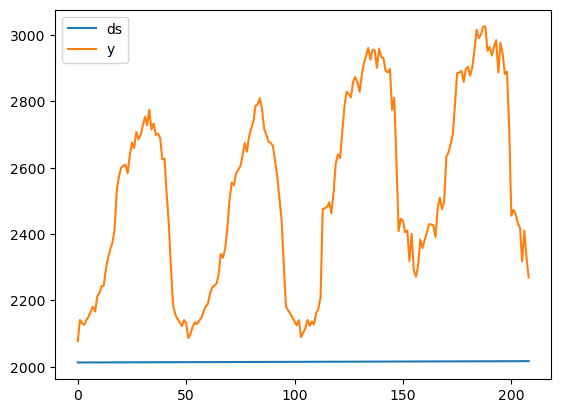

In [11]:

y_semanal.plot()

In [12]:
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
train, test = train_test_split(y_semanal, test_size=0.2, shuffle=False)  # Por ejemplo, 80% entrenamiento y 20% prueba

# Inicializar y ajustar el modelo Prophet con los datos de entrenamiento
model = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=0.1,
    holidays_prior_scale=0.01,
    changepoint_range=0.9,
    yearly_seasonality=7
)
model.fit(train)

# Realizar predicciones en el conjunto de prueba
forecast = model.predict(test)

# Mostrar las predicciones y los valores reales
print(forecast[['ds', 'yhat']])
print(test[['ds', 'y']])

# Calcular alguna métrica de desempeño si es necesario
# Por ejemplo, puedes utilizar métricas como RMSE o MAE para evaluar el modelo


18:14:04 - cmdstanpy - INFO - Chain [1] start processing
18:14:04 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat
0  2016-03-20  212057.196300
1  2016-03-27  220268.989997
2  2016-04-03  224996.266208
3  2016-04-10  230029.782825
4  2016-04-17  239506.520901
5  2016-04-24  255404.475154
6  2016-05-01  276339.902395
7  2016-05-08  298350.054195
8  2016-05-15  317093.443894
9  2016-05-22  330069.329261
10 2016-05-29  337557.595909
11 2016-06-05  341889.840605
12 2016-06-12  345739.027052
13 2016-06-19  350642.307278
14 2016-06-26  356642.641304
15 2016-07-03  363040.875089
16 2016-07-10  369454.580417
17 2016-07-17  376244.345853
18 2016-07-24  383959.305821
19 2016-07-31  392306.885939
20 2016-08-07  399610.689696
21 2016-08-14  403414.446657
22 2016-08-21  402011.901723
23 2016-08-28  395867.301047
24 2016-09-04  387771.272256
25 2016-09-11  381321.195786
26 2016-09-18  378475.760748
27 2016-09-25  377721.939431
28 2016-10-02  374211.623085
29 2016-10-09  362097.640470
30 2016-10-16  337895.480105
31 2016-10-23  302923.660987
32 2016-10-30  263281.455721
33 2016-11-06 

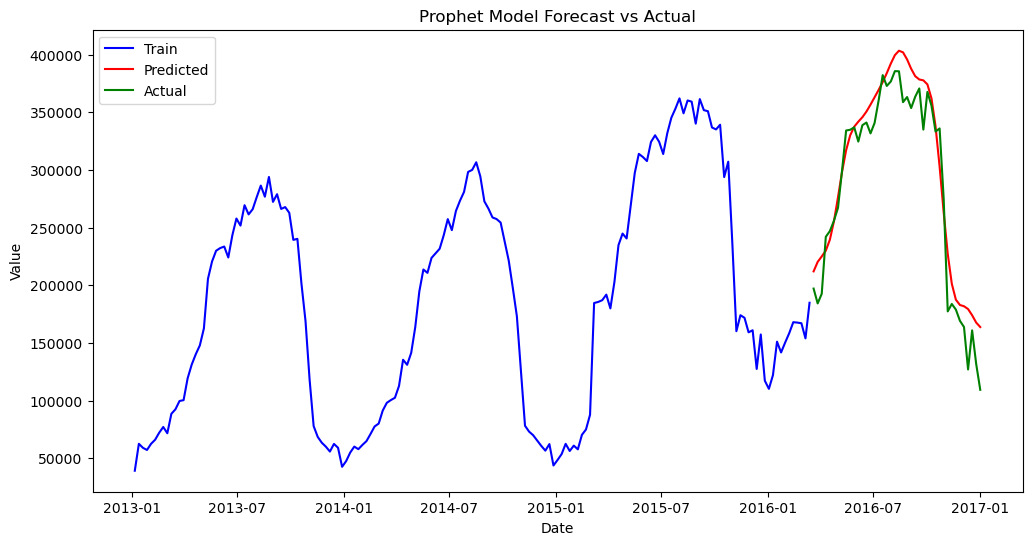

In [13]:
import matplotlib.pyplot as plt

# Graficar los datos de entrenamiento y las predicciones en el conjunto de prueba
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar datos de entrenamiento
ax.plot(train['ds'], train['y'], label='Train', color='blue')

# Graficar predicciones en el conjunto de prueba
ax.plot(test['ds'], forecast['yhat'], label='Predicted', color='red')

# Graficar los valores reales en el conjunto de prueba
ax.plot(test['ds'], test['y'], label='Actual', color='green')

# Configuración del gráfico
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model Forecast vs Actual')
plt.legend()
plt.show()


In [14]:
#Evaluamos métricas
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    y_true = y_true[mask]
    y_pred = y_pred[mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 if len(y_true) > 0 else 0.0

# Calcular el MAPE entre las predicciones y los valores reales evitando los ceros
mape = mean_absolute_percentage_error(test['y'].values, forecast['yhat'].values)

print(f"El MAPE es: {mape:.2f}%")



El MAPE es: 8.66%


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculando MSE
mse = mean_squared_error(test['y'].values, forecast['yhat'].values)

# Calculando R2 score
r2 = r2_score(test['y'].values, forecast['yhat'].values)

print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"R2 score: {r2:.2f}")


MAPE: 8.66%
MSE: 569170220.99
R2 score: 0.92


# Prediccion ENERO


Entrenamos el modelo con todo el conjunto de datos para tener mas datos para entrenar

In [16]:
# Inicializar y ajustar el modelo Prophet con los datos de entrenamiento
model = Prophet(
    seasonality_mode='additive',
    changepoint_prior_scale=0.1,
    holidays_prior_scale=0.01,
    changepoint_range=0.9,
    yearly_seasonality=20
)
model.fit(y_semanal)



# Mostrar las predicciones y los valores reales
print(forecast[['ds', 'yhat']])
print(test[['ds', 'y']])

# Calcular alguna métrica de desempeño si es necesario
# Por ejemplo, puedes utilizar métricas como RMSE o MAE para evaluar el modelo


18:14:05 - cmdstanpy - INFO - Chain [1] start processing
18:14:05 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat
0  2016-03-20  212057.196300
1  2016-03-27  220268.989997
2  2016-04-03  224996.266208
3  2016-04-10  230029.782825
4  2016-04-17  239506.520901
5  2016-04-24  255404.475154
6  2016-05-01  276339.902395
7  2016-05-08  298350.054195
8  2016-05-15  317093.443894
9  2016-05-22  330069.329261
10 2016-05-29  337557.595909
11 2016-06-05  341889.840605
12 2016-06-12  345739.027052
13 2016-06-19  350642.307278
14 2016-06-26  356642.641304
15 2016-07-03  363040.875089
16 2016-07-10  369454.580417
17 2016-07-17  376244.345853
18 2016-07-24  383959.305821
19 2016-07-31  392306.885939
20 2016-08-07  399610.689696
21 2016-08-14  403414.446657
22 2016-08-21  402011.901723
23 2016-08-28  395867.301047
24 2016-09-04  387771.272256
25 2016-09-11  381321.195786
26 2016-09-18  378475.760748
27 2016-09-25  377721.939431
28 2016-10-02  374211.623085
29 2016-10-09  362097.640470
30 2016-10-16  337895.480105
31 2016-10-23  302923.660987
32 2016-10-30  263281.455721
33 2016-11-06 

In [17]:
# Creamos un dataframe para predecir enero
fechas_enero_2017 = pd.date_range(start='2017-01-01', end='2017-01-31', freq='W')

df_prediccion = pd.DataFrame({'ds': fechas_enero_2017})
df_prediccion

,ds
0,2017-01-01
1,2017-01-08
2,2017-01-15
3,2017-01-22
4,2017-01-29


In [18]:
# Elaboramos el forecast del mes de enero con .predict
forecast_enero_2017 = model.predict(df_prediccion)
forecast_enero_2017

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,267773.284742,108159.073814,140490.458146,267773.284742,267773.284742,-143849.495215,-143849.495215,-143849.495215,-143849.495215,-143849.495215,-143849.495215,0.0,0.0,0.0,123923.789527
1,2017-01-08,268012.532701,129339.061109,160643.944041,268012.532701,268012.532701,-122372.918316,-122372.918316,-122372.918316,-122372.918316,-122372.918316,-122372.918316,0.0,0.0,0.0,145639.614385
2,2017-01-15,268251.780661,142774.606726,175374.187873,268231.963531,268268.918936,-109214.062119,-109214.062119,-109214.062119,-109214.062119,-109214.062119,-109214.062119,0.0,0.0,0.0,159037.718542
3,2017-01-22,268491.028621,138465.958252,168855.852525,268391.597920,268590.250835,-114910.485319,-114910.485319,-114910.485319,-114910.485319,-114910.485319,-114910.485319,0.0,0.0,0.0,153580.543302
4,2017-01-29,268730.276580,141440.397906,174034.637185,268539.501984,268949.496639,-110085.961115,-110085.961115,-110085.961115,-110085.961115,-110085.961115,-110085.961115,0.0,0.0,0.0,158644.315465


In [22]:
#Creame un dataset solo con la columna yhat sin el ds
forecast_enero_2017_predicciones = forecast_enero_2017[['yhat']]
#Guardamelo en un csv llamado predicciones_semanales_enero2017.csv
forecast_enero_2017_predicciones.to_csv('predicciones_semanales_enero2017.csv')

In [19]:
# sumame los resultados de yhat
forecast_enero_2017['yhat'].sum()

740825.9812214719

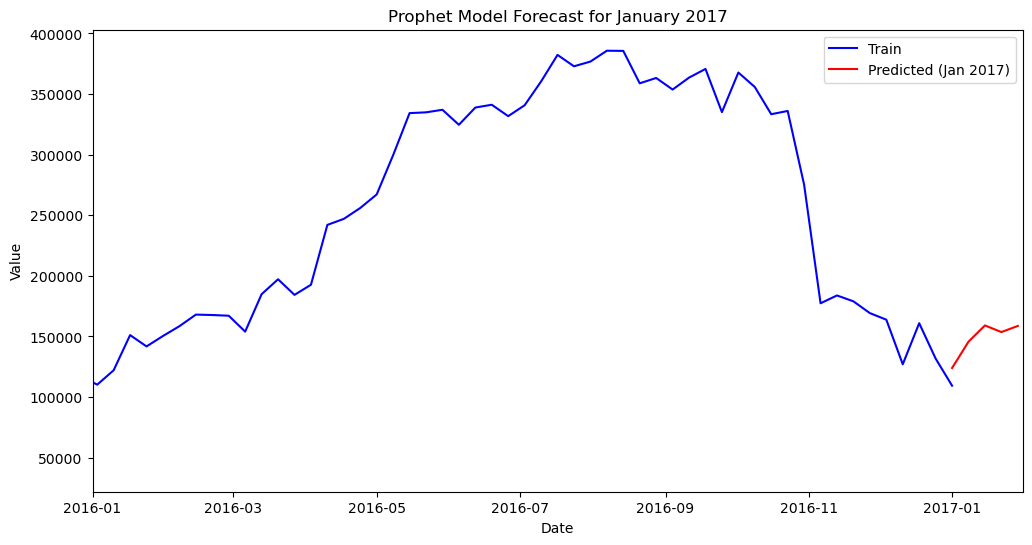

In [20]:
import matplotlib.pyplot as plt

# Graficar los datos de entrenamiento y las predicciones en el conjunto de prueba
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar datos de entrenamiento (y_semanal)
ax.plot(y_semanal['ds'], y_semanal['y'], label='Train', color='blue')

# Graficar predicciones para enero de 2017 (forecast_enero_2017)
ax.plot(forecast_enero_2017['ds'], forecast_enero_2017['yhat'], label='Predicted (Jan 2017)', color='red')

# Configuración del gráfico
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model Forecast for January 2017')
plt.legend()
# Establecer límites del eje x para hacer zoom en enero de 2017
plt.xlim(pd.to_datetime('2016-01-01'), pd.to_datetime('2017-01-31'))
plt.show()
